<a href="https://colab.research.google.com/github/marcosdiezw/BH_carnival_chatbot/blob/main/BH_carnival_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **<center> <font color= darkblue size=8> CARNAVAL DE BELO HORIZONTE 2018 </font>**
***

<left>
<img src="https://lh3.googleusercontent.com/Q7Gypg7GyRmPn1z8_cQOYIDOC1VyqjBdaMQFP1tukOlRu2Qde7o9NYpif3N4GsCC8dax1h4t9erOi_M6yflmcRS8BiHkIH4YKeNNb6TKwqeAFLsbmcDCL2AKx6zuherYhQ" align="middle" width="400" height="200">
</left>

<right>
<img src="https://prefeitura.pbh.gov.br/sites/default/files/estrutura-de-governo/comunicacao/2021/logo_21prancheta-1.png" alt="image description" align="right" width="400" height="200">
</right>

# Introdução

No seguinte estudo de caso se descreverão de forma geral os dados colhidos do serviço de chatbot fornecido pela Take Blip, no contexto do Carnaval de Belo Horizonte 2018.
***

**Objetivo:** Analisar os dados registrados pelo Chatbot e responder/comentar
os pontos abaixo:
- O que os usuários buscavam no Chatbot? Acessaram o Chatbot com qual
objetivo?
- Diante das análises realizadas, quais são as tendências de comportamento? O
que te chamou a atenção com relação à utilização da plataforma pelos usuários?
- Aponte pelo menos 3 insights embasados em dados que podem trazer melhoria
e/ou evolução para o Chatbot.

In [ ]:
# Importamos os pacotes a serem utilizados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

In [ ]:
# Carregamos os arquivos e criamos com eles os dataframes com que vamos trabalhar.

df_Messages = pd.read_csv('DadosBrutosMessages.csv',sep=';', encoding='latin-1')
df_EventTracks = pd.read_csv('DadosBrutosEventTracks.csv',sep=';', encoding='latin-1')

# <font size=5>**Descrição das bases e dos tipos de dados**

In [ ]:
#Descrição dos tipos de dados

df_Messages.info()
print('\n')
df_EventTracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33766 entries, 0 to 33765
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ï»¿MessageSequentialID  33766 non-null  int64 
 1   StorageDate             33766 non-null  object
 2   FromIdentity            33766 non-null  object
 3   ToIdentity              33766 non-null  object
 4   Message                 33766 non-null  object
 5   MessageOriginator       33766 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52900 entries, 0 to 52899
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ï»¿EventTrackSequentialID  52900 non-null  int64 
 1   OwnerIdentity              52900 non-null  object
 2   StorageDate                52900 non-null  object
 3   Category                   52900 non

In [ ]:
# Ajeitamos o nomes respectivos das primeiras colunas para elas ficarem mais simples e claras.

df_Messages.rename(columns={'ï»¿MessageSequentialID':'MessageSequentialID'}, inplace=True)

df_EventTracks.rename(columns={'ï»¿EventTrackSequentialID':'EventTrackSequentialID'}, inplace=True)

In [ ]:
df_Messages.head(3)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
0,73719,2018-02-02 13:51:58.78 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,comecar,User
1,73722,2018-02-02 13:52:00.92 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"E ai Alan Pierre, o carnaval de BH jÃ¡ comeÃ§o...",Bot
2,73723,2018-02-02 13:52:03.90 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Se vocÃª nÃ£o sabe onde ir, posso te ajudar co...",Bot


In [ ]:
df_EventTracks.head(4)

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
0,100,carnabelo@msging.net,2018-02-02 13:51:59.72 -02:00,Flow,Boas vindas
1,101,carnabelo@msging.net,2018-02-02 13:52:10.89 -02:00,Flow,Objetivo - Beber
2,102,carnabelo@msging.net,2018-02-02 13:52:10.98 -02:00,Objetivo,Beber
3,103,carnabelo@msging.net,2018-02-02 13:52:13.15 -02:00,Flow,Intro


# Perguntas estratégicas:

## <font color=darkblue size=4> **1) O que os usuários buscavam no Chatbot? Acessaram o Chatbot com qual objetivo?** </font>

In [ ]:
# Reunimos em um DataFrame as ações do chatbot que indicavam objetivos concretos:

Objectives = df_EventTracks[(df_EventTracks.Category=='Objetivo')|(df_EventTracks.Action.str.contains('Objetivo')==True)][['Category','Action']].value_counts().to_frame().reset_index()
Objectives.rename(columns = {0:'Count'}, inplace=True)
most_frequent_objective = Objectives.Action[Objectives.Count.idxmax()]
Objectives

,Category,Action,Count
0,Flow,Objetivo - Dancar,335
1,Objetivo,Dancar,335
2,Flow,Objetivo - Tudo,236
3,Objetivo,Tudo,236
4,Flow,Objetivo - Beijar,112
5,Objetivo,Beijar,112
6,Flow,Objetivo - Beber,102
7,Objetivo,Beber,102


In [ ]:
'''Note-se que os valores ficaram duplicados em linhas diferentes pois
os eventos foram registrados em várias categorias.
Para a nossa análise consideraremos só uma linha para cada objetivo respectivo.
'''
print('O objetivo com o qual ingressaram mais no chatbot foi:', most_frequent_objective)

O objetivo com o qual ingressaram mais no chatbot foi: Objetivo - Dancar


## <font color=darkblue size=4> **2.1) Quantas mensagens foram enviadas**

In [ ]:
q_mensagens = df_Messages.Message.count()
print('Foram enviadas no total',q_mensagens,'mensagens.')

Foram enviadas no total 33766 mensagens.


In [ ]:
# A variável bot_messages recolhe as mensagens enviadas pelos usuários:
users_messages = df_Messages[df_Messages.MessageOriginator=='User']

# A variável bot_messages recolhe as mensagens enviadas pelo bot:
bot_messages = df_Messages[df_Messages.MessageOriginator=='Bot']

print('Os usuários enviaram',users_messages.Message.count(), 'mensagens.')
print('O bot enviou',bot_messages.Message.count(),'mensagens.')

Os usuários enviaram 11022 mensagens.
O bot enviou 22744 mensagens.


In [ ]:
blocos = df_Messages[df_Messages['Message'].str.contains('bloco', na=False)]
blocos.Message[blocos.FromIdentity!='carnabelo@msging.net'].count()

408

## <font color=darkblue size=4>  **2.2) Qual o tópico mais frequente das mensagens?** </font>

In [ ]:
# Levando em conta as informações fornecidas pela empresa sobre a estrutura do chat
# avaliamos inicialmente as mensagens baseados em um conjunto de palavras chave.

keywords = [
    'beij', 'beb', 'danÃ§', 'danca','bloco','Bloco','bloquinho','arrastao', 'Arrast', 'comeÃ§',
    'tudo','cidade','opÃ§Ãµes','regiÃ£o','RegiÃ£o', 'localizaÃ§Ã£o','LocalizaÃ§Ã£o', 'policia',
    'saude','saúde','emerg','urgen']

frequent_bot_keywords = {}
bot_keywords = {}
for i in keywords:
  bot_keywords[i]= bot_messages[bot_messages['Message'].str.contains(i, na=False)].Message.count()
ordered_bot_keywords = sorted(bot_keywords, key=bot_keywords.get, reverse=True)
for word in ordered_bot_keywords:
  frequent_bot_keywords[word]=bot_keywords[word]

frequent_users_keywords = {}
users_keywords = {}
for i in keywords:
  users_keywords[i]=users_messages[users_messages['Message'].str.contains(i, na=False)].Message.count()
ordered_users_keywords = sorted(users_keywords, key=users_keywords.get, reverse=True)
for word in ordered_bot_keywords:
  frequent_users_keywords[word]=bot_keywords[word]



In [ ]:
print('Palavras-chave mais frequentes nas mensagens do bot:\n',frequent_bot_keywords,'\n')
print('Palavras-chave mais frequentes nas mensagens dos usuários:\n',frequent_users_keywords)

Palavras-chave mais frequentes nas mensagens do bot:
 {'bloco': 6420, 'cidade': 1389, 'bloquinho': 1092, 'opÃ§Ãµes': 1052, 'comeÃ§': 825, 'Bloco': 469, 'danÃ§': 399, 'Arrast': 90, 'beb': 27, 'beij': 23, 'tudo': 2, 'danca': 0, 'arrastao': 0, 'regiÃ£o': 0, 'RegiÃ£o': 0, 'localizaÃ§Ã£o': 0, 'LocalizaÃ§Ã£o': 0, 'policia': 0, 'saude': 0, 'saúde': 0, 'emerg': 0, 'urgen': 0} 

Palavras-chave mais frequentes nas mensagens dos usuários:
 {'bloco': 6420, 'cidade': 1389, 'bloquinho': 1092, 'opÃ§Ãµes': 1052, 'comeÃ§': 825, 'Bloco': 469, 'danÃ§': 399, 'Arrast': 90, 'beb': 27, 'beij': 23, 'tudo': 2, 'danca': 0, 'arrastao': 0, 'regiÃ£o': 0, 'RegiÃ£o': 0, 'localizaÃ§Ã£o': 0, 'LocalizaÃ§Ã£o': 0, 'policia': 0, 'saude': 0, 'saúde': 0, 'emerg': 0, 'urgen': 0}


In [ ]:
# PALAVRA CHAVE MAIS FREQUENTE:

users_frequent_word = max(users_keywords, key= users_keywords.get)
bot_frequent_word = max(bot_keywords, key= bot_keywords.get)
if users_frequent_word == bot_frequent_word:
  popular_word = users_frequent_word
  print('A PALAVRA CHAVE MAIS FREQUENTE DOS USUÁRIOS E DO BOT FOI:', popular_word)
else:
  if users_frequent_word > bot_frequent_word:
    popular_word = users_frequent_word
  else:
    popular_word = bot_frequent_word
  print('A palavra chave mais frequente entre os usuários foi: ', users_frequent_word)
  print('A palavra chave mais frequente do bot foi: ', bot_frequent_word)

number_word = df_Messages[df_Messages.Message.str.contains(popular_word, na=False)].Message.count()
print('HOUVE {} MENSAGENS COMO A PALAVRA "{}"'.format(number_word, popular_word))


A PALAVRA CHAVE MAIS FREQUENTE DOS USUÁRIOS E DO BOT FOI: bloco
HOUVE 6828 MENSAGENS COMO A PALAVRA "bloco"


## <font color=darkblue size=4>  **3) Quais os blocos que tiveram maior relevância?** </font>

Tendo identificadas duas mensagens padrão que sinalizaram os nomes dos blocos, as utilizaremos para fazer uma contagem das ocorrências dos mais mencionados.

* O chatbot tem a seguinte mensagem padrão para avisar o usuário quando um bloco está prestes de começar:

> ***a) O bloco ..., começa em ... minutos!!!***

In [ ]:
# Para identificar os nomes dos blocos que mais apareceram nos chats,
# procuramos em mensagens do tipo a):
df_Messages[df_Messages['Message'].str.contains('comeÃ§a em', na=False)].Message[:7]

421     O bloco o Abre-te SÃ©samo, comeÃ§a em 58 minut...
434     O bloco o Abre-te SÃ©samo, comeÃ§a em 57 minut...
2306    O bloco o A culpa Ã© dele, comeÃ§a em 50 minut...
2315    O bloco o BlocÃ£o Pet, comeÃ§a em 48 minutos!!...
2705    O bloco o Pega na Mangueira, comeÃ§a em 47 min...
4144      O bloco o Alalaor, comeÃ§a em 82 minutos!!!\n\n
4443    O bloco o Bloco Boi Rosado, comeÃ§a em 58 minu...
Name: Message, dtype: object

In [ ]:
# Para armazenar os nomes dos blocos, salvamos só a parte das mensagens onde eles aparecem:

blocos = df_Messages[df_Messages['Message'].str.contains('comeÃ§a em', na=False)].Message
blocos_names = []
for i in blocos:
  a = i.find("O bloco o ") + len("O bloco o ")
  b = i.find(", comeÃ§a em")
  bloco = i[a:b]
  blocos_names.append(bloco)
blocos_names = set(blocos_names)

frequent_blocos = {}
popular_blocos = {}
for i in blocos_names:
  frequent_blocos[i]=df_Messages[df_Messages['Message'].str.contains(i, na=False)].Message.count()
ordered_blocos = sorted(frequent_blocos, key=frequent_blocos.get, reverse=True)[:10]
for bloco in ordered_blocos:
  popular_blocos[bloco]= frequent_blocos[bloco] # Salvamos aqui os nomes dos 10 blocos
                                                # mais populares

print('NOMES DOS 10 BLOCOS MAIS POPULARES NAS MENSAGENS:\n')
popular_blocos

NOMES DOS 10 BLOCOS MAIS POPULARES NAS MENSAGENS:



{'Funk You': 152,
 'Baianas Ozadas': 78,
 'ArrastÃ£o EletrÃ´nico': 77,
 'Bloco Juventude Bronzeada': 67,
 'Chama o SÃ\xadndico': 65,
 'Tchanzinho Zona Norte': 60,
 'Quando come se lambuza': 59,
 'Baque de Mina': 57,
 'Transa! - AtrÃ¡s do trio elÃ©trico': 54,
 'Haja Amor': 50}

* O chatbot ofereceu também informações dos blocos em mensagens do seguinte tipo:

> **b) Bloco - *nome do bloco***

In [ ]:
opa = df_EventTracks[df_EventTracks['Action'].str.contains('Cabify')]
opa.count()

EventTrackSequentialID    102
OwnerIdentity             102
StorageDate               102
Category                  102
Action                    102
dtype: int64

In [ ]:
blocos1 = df_EventTracks[((df_EventTracks.Category=='Eu vou')|(df_EventTracks.Category=='Como chegar')) & (df_EventTracks['Action'].str.contains('Bloco - '))].Action
blocos1.value_counts()[:8]

Bloco - Funk You                              134
Bloco - Baianas Ozadas                         71
Bloco - EntÃ£o, Brilha!                        69
Bloco - Chama o SÃ­ndico                       64
Bloco - Bloco Juventude Bronzeada              60
Bloco - Transa! - AtrÃ¡s do trio elÃ©trico     57
Bloco - Quando come se lambuza                 57
Bloco - Tchanzinho Zona Norte                  53
Name: Action, dtype: int64

In [ ]:
df_EventTracks[df_EventTracks['Action'].str.contains('Vou te ajudar', na=False)]

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action


In [ ]:
blocos_names1 = []
for i in blocos1:
  a = i.find("Bloco - ") + len("Bloco - ")
  bloco1 = i[a:]
  if bloco1 != '':
    blocos_names1.append(bloco1)
blocos_names1 = set(blocos_names1)

frequent_blocos1 = {}
popular_blocos1 = {}
for i in blocos_names1:
  frequent_blocos1[i]=df_EventTracks[df_EventTracks['Action'].str.contains(i, na=False)].Action.count()
ordered_blocos1 = sorted(frequent_blocos1, key=frequent_blocos1.get, reverse=True)[:10]
for bloco1 in ordered_blocos1:
  popular_blocos1[bloco1]= frequent_blocos1[bloco1]

print('NOMES DOS 10 BLOCOS MAIS POPULARES NO REGISTRO DE AÇÕES:\n')
popular_blocos1

NOMES DOS 10 BLOCOS MAIS POPULARES NO REGISTRO DE AÇÕES:



{'Funk You': 135,
 'EntÃ£o, Brilha!': 77,
 'Baianas Ozadas': 75,
 'Chama o SÃ\xadndico': 64,
 'Quando come se lambuza': 61,
 'Bloco Juventude Bronzeada': 60,
 'Transa! - AtrÃ¡s do trio elÃ©trico': 60,
 'Tchanzinho Zona Norte': 60,
 'ArrastÃ£o EletrÃ´nico': 51,
 'Trio Sem Frescuras da @bsurda': 48}

In [ ]:
# Juntamos em uma só lista os blocos mais populares, em mensagens e ações:

most_popular_blocos={}
for a in popular_blocos:
  for b in popular_blocos1:
    if a==b:
      most_popular_blocos[a]= popular_blocos[a] + popular_blocos1[b]
    else:
      if most_popular_blocos.get(a, 'non-existent') == 'non-existent':
        most_popular_blocos[a] = popular_blocos[a]
      else:
        None
      if most_popular_blocos.get(b, 'non-existent') == 'non-existent':
        most_popular_blocos[b] = popular_blocos1[b]
      else:
        None
print('NOMES DOS BLOCOS MAIS POPULARES:\n\n', most_popular_blocos)

NOMES DOS BLOCOS MAIS POPULARES:

 {'Funk You': 287, 'EntÃ£o, Brilha!': 77, 'Baianas Ozadas': 153, 'Chama o SÃ\xadndico': 129, 'Quando come se lambuza': 120, 'Bloco Juventude Bronzeada': 127, 'Transa! - AtrÃ¡s do trio elÃ©trico': 114, 'Tchanzinho Zona Norte': 120, 'ArrastÃ£o EletrÃ´nico': 128, 'Trio Sem Frescuras da @bsurda': 48, 'Baque de Mina': 57, 'Haja Amor': 50}


In [ ]:
df_most_popular_blocos = pd.DataFrame(list(most_popular_blocos.items()), columns=['Bloco','Ocorrencias'])
df_most_popular_blocos = df_most_popular_blocos.sort_values(by='Ocorrencias', ascending=False)[:4]
df_most_popular_blocos

,Bloco,Ocorrencias
0,Funk You,287
2,Baianas Ozadas,153
3,Chama o SÃ­ndico,129
8,ArrastÃ£o EletrÃ´nico,128


In [ ]:
most_popular_bloco = max(most_popular_blocos, key= most_popular_blocos.get)
print('O bloco mais popular foi:', most_popular_bloco)


O bloco mais popular foi: Funk You


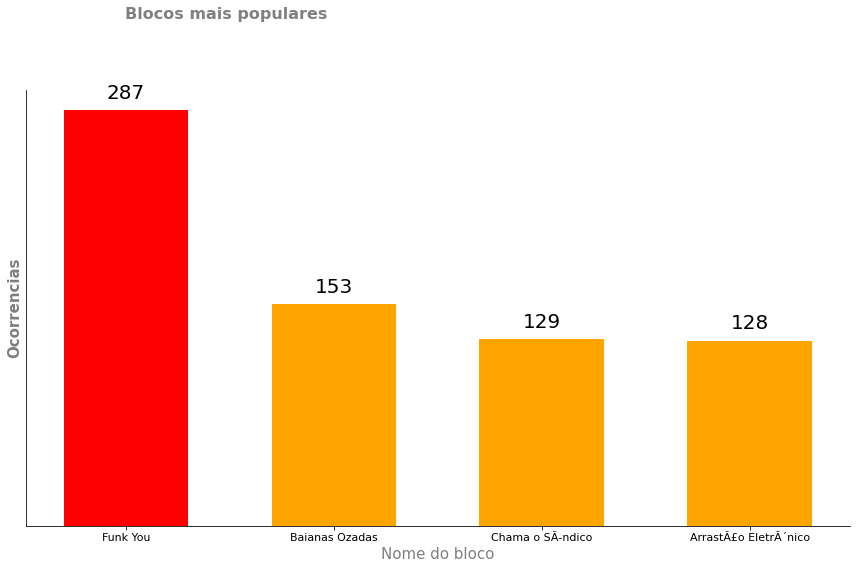

In [ ]:
#Criando o gráfico

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax1.bar('Bloco', 'Ocorrencias', data= df_most_popular_blocos, 
       color=['red', 'orange', 'orange','orange','orange',
              'orange','orange','orange','orange','orange'], width=0.6)

#titulo
ax1.text(-0.005, 350, 'Blocos mais populares', fontsize=16, 
         color='gray', fontweight='bold')

#Remover eixos e aparência geral - Casos
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks(ticks=[])


#Alterando o tamanho dos rótulos no eixos X e Y
for l in (ax1.get_xticklabels() + ax1.get_yticklabels()):
  l.set_fontsize(11)

#Criando função para exibir rótulos
for i in ax1.patches:
    ax1.text(i.get_x() + i.get_width()/2, 
            i.get_height() + 8, 
            '{:,}'.format(i.get_height()),
            ha = 'center',
            fontsize = 20, 
            color = 'black') 

ax1.set_xlabel('Nome do bloco',  color='gray', fontsize=15)
ax1.set_ylabel('Ocorrencias', fontsize=15, color='gray', fontweight='bold')

plt.tight_layout()

## <font color=darkblue size=4>  **4.1) Quais foram as datas mais quentes?**

In [ ]:
df_EventTracks

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
0,100,carnabelo@msging.net,2018-02-02 13:51:59.72 -02:00,Flow,Boas vindas
1,101,carnabelo@msging.net,2018-02-02 13:52:10.89 -02:00,Flow,Objetivo - Beber
2,102,carnabelo@msging.net,2018-02-02 13:52:10.98 -02:00,Objetivo,Beber
3,103,carnabelo@msging.net,2018-02-02 13:52:13.15 -02:00,Flow,Intro
4,104,carnabelo@msging.net,2018-02-02 13:52:17.34 -02:00,Flow,Menu
...,...,...,...,...,...
52895,62980,carnabelo@msging.net,2018-02-27 09:16:34.80 -03:00,Flow,API - Carrossel blocos - Agenda
52896,62981,carnabelo@msging.net,2018-02-27 09:16:34.87 -03:00,Pesquisa - Bairro,Santa Rosa
52897,62982,carnabelo@msging.net,2018-02-27 10:17:09.71 -03:00,Flow,Respostas para carrossel
52898,62983,carnabelo@msging.net,2018-02-27 10:17:09.87 -03:00,Flow,Compartilhar - Intro


In [ ]:
df_Messages['StorageDate'] = pd.to_datetime(df_Messages.StorageDate, utc=True)
df_EventTracks['StorageDate'] = pd.to_datetime(df_Messages.StorageDate, utc=True)

In [ ]:
def day_time(hour_minute):
  hora, minuto = hour_minute.split(':')
  decimal_time = float(hora)+(float(minuto)/60)
  if decimal_time>0 and decimal_time<4:
    return '[00-4)'
  elif decimal_time >= 4 and decimal_time<8:
    return '[4-8)'
  elif decimal_time >=8 and decimal_time<12:
    return '[8-12)'
  elif decimal_time >=12 and decimal_time<16:
    return '[12-16)'
  elif decimal_time>=16 and decimal_time<20:
    return '[16-20)'
  elif decimal_time>=20 and decimal_time<24:
    return '[20-24)'

def day_name(number_day):
  if number_day % 7 == 0:
    return 'quarta'
  if number_day % 7 == 1:
    return 'quinta'
  if number_day % 7 == 2:
    return 'sexta'
  if number_day % 7 == 3:
    return 'sabado'
  if number_day % 7 == 4:
    return 'domingo'
  if number_day % 7 == 5:
    return 'segunda'
  if number_day % 7 == 6:
    return 'terca'

In [ ]:
df_Messages['Month'] = df_Messages['StorageDate'].dt.month
df_Messages['Day_number'] = df_Messages['StorageDate'].dt.day
df_Messages['Hour_minute'] = df_Messages['StorageDate'].dt.strftime('%H:%M')


df_Messages['Time_slot'] = df_Messages['Hour_minute'].apply(lambda s: day_time(s))
df_Messages['Day_name'] = df_Messages['Day_number'].apply(lambda s: day_name(s))


df_EventTracks['Month'] = df_EventTracks['StorageDate'].dt.month
df_EventTracks['Day_number'] = df_EventTracks['StorageDate'].dt.day
df_EventTracks['Hour_minute'] = df_EventTracks['StorageDate'].dt.strftime('%H:%M')

In [ ]:
def day_time2(hour_minute):
  if type(hour_minute) == True:
    hora, minuto = hour_minute.split(':')
    decimal_time = float(hora)+(float(minuto)/60)
    if decimal_time>0 and decimal_time<4:
      return '[00-4)'
    elif decimal_time >= 4 and decimal_time<8:
      return '[4-8)'
    elif decimal_time >=8 and decimal_time<12:
      return '[8-12)'
    elif decimal_time >=12 and decimal_time<16:
      return '[12-16)'
    elif decimal_time>=16 and decimal_time<20:
      return '[16-20)'
    elif decimal_time>=20 and decimal_time<24:
      return '[20-24)'

df_EventTracks['Day_name'] = df_EventTracks['Day_number'].apply(lambda s: day_name(s))
df_EventTracks['Time_slot'] = df_EventTracks['Hour_minute'].apply(lambda s: day_time2(s))


In [ ]:
print('AS 5 DATAS MAIS QUENTES FORAM:\n')
df_Messages.Day_number.value_counts()[:10]

AS 5 DATAS MAIS QUENTES FORAM:



10    4742
12    4569
13    4279
11    3977
9     2994
8     1966
2     1798
3     1769
14    1768
6     1674
Name: Day_number, dtype: int64

In [ ]:
print('A DATA MAIS QUENTE FOI NO DIA {}  DE FEVEREIRO'.format(df_Messages.Day_number.value_counts().idxmax()))

A DATA MAIS QUENTE FOI NO DIA 10  DE FEVEREIRO


In [ ]:
datas_carnaval = df_Messages.Day_number.value_counts().to_frame().reset_index()
datas_carnaval.rename(columns={'index':'Day_number','Day_number':'Count'}, inplace=True)
datas_carnaval = datas_carnaval.sort_values(by='Day_number', ascending=True)

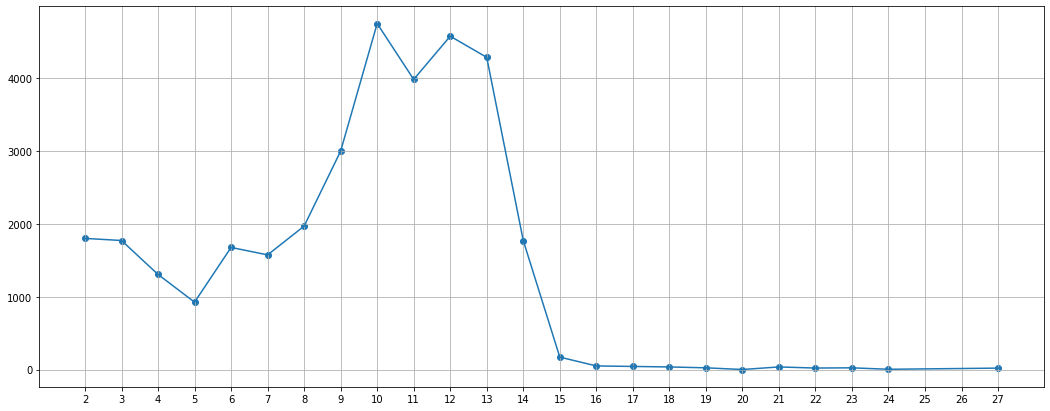

In [ ]:
# Gráfico de ocorrências de mensagens por data:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,7))

maxim = datas_carnaval.Count.max()
minim = datas_carnaval.Count.min()
unid = (maxim - minim)/100
eixx = np.arange(2, 28, 1)
eixy = np.arange(minim, maxim, unid)

plt.grid(True)
plt.xticks(eixx)

plt.scatter(datas_carnaval.Day_number, datas_carnaval.Count);
ax =plt.plot(datas_carnaval.Day_number, datas_carnaval.Count);

## <font color=darkblue size=4>  **4.2) Qual o dia da semana que registrou mais atividade?**

In [ ]:
print('O DIA DA SEMANA QUE REGISTROU MAIS ATIVIDADE FOI {} '.format(df_Messages.Day_name.value_counts().idxmax()))
print('\nSEGUE O DETALHE DE TODOS OS DIAS:\n')
df_Messages.Day_name.value_counts()


O DIA DA SEMANA QUE REGISTROU MAIS ATIVIDADE FOI sabado 

SEGUE O DETALHE DE TODOS OS DIAS:



sabado     6558
terca      5974
segunda    5517
domingo    5317
sexta      4866
quarta     3376
quinta     2158
Name: Day_name, dtype: int64

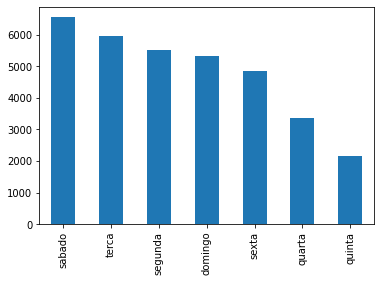

In [ ]:
df_Messages.Day_name.value_counts().plot(kind='bar');

## <font color=darkblue size=4> **5) Quais foram os horários mais intensos?** </font>

In [ ]:
timeslots = df_Messages.Time_slot.value_counts()
timeslots

[12-16)    10306
[16-20)     8316
[20-24)     6898
[00-4)      4250
[8-12)      3318
[4-8)        648
Name: Time_slot, dtype: int64

In [ ]:
print('O HORÁRIO MAIS QUENTE FOI NA FAIXA DE ',timeslots.idxmax(), 'HORAS')

O HORÁRIO MAIS QUENTE FOI NA FAIXA DE  [12-16) HORAS


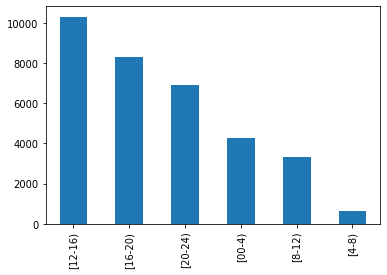

In [ ]:
df_Messages.Time_slot.value_counts().plot(kind='bar');

## <font color=darkblue size=4> **6) Quais foram os bairros mais movimentados?** </font>

In [ ]:
neighborhoods = df_EventTracks[df_EventTracks.Category=='Pesquisa - Bairro'].Action.value_counts().sort_values(ascending=False)[:5]
neighborhoods = neighborhoods.to_frame().reset_index()
neighborhoods.rename(columns={'index':'Neighborhood','Action':'Count'}, inplace=True)
print('OS 5 BAIRROS QUE TIVERAM MAIOR MOVIMENTO FORAM:\n\n')
neighborhoods

OS 5 BAIRROS QUE TIVERAM MAIOR MOVIMENTO FORAM:




,Neighborhood,Count
0,Centro,657
1,Floresta,362
2,FuncionÃ¡rios,348
3,Santa Tereza,267
4,Savassi,157


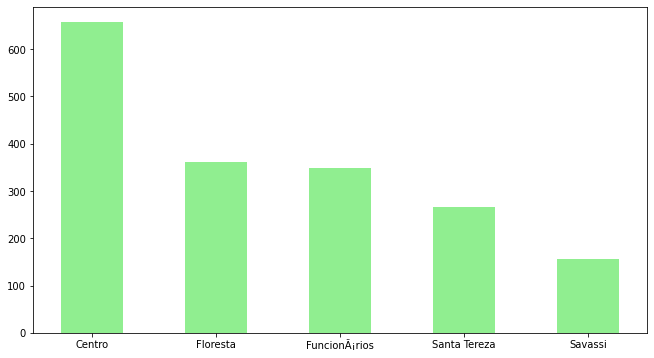

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,6))

ax.bar('Neighborhood','Count', data= neighborhoods, width=0.5, color='lightgreen');

## <font color=darkblue size=4> **7) Os usuários utilizaram o cupom de Cabify com objeto de não dirigir?** </font>

In [ ]:
cupom_users = df_Messages[(df_Messages.Message.str.contains('cabify|Cabif')&(df_Messages.MessageOriginator!='Bot'))].FromIdentity.value_counts().to_frame().reset_index()
cupom_users.rename(columns={'index':'FromIdentity','FromIdentity':'Count'}, inplace=True)
cupom_users

,FromIdentity,Count
0,2132001316817479@messenger.gw.msging.net,4
1,1513684378752106@messenger.gw.msging.net,2
2,1767958763279497@messenger.gw.msging.net,1
3,1775489765818948@messenger.gw.msging.net,1
4,1648883331824659@messenger.gw.msging.net,1
5,1571568009545564@messenger.gw.msging.net,1
6,1579935998780065@messenger.gw.msging.net,1


In [ ]:
drinkers = df_Messages[df_Messages.Message.str.contains('beb')&(df_Messages.MessageOriginator!='Bot')].FromIdentity.value_counts().to_frame().reset_index()
drinkers.rename(columns={'index':'FromIdentity','FromIdentity':'Count'}, inplace=True)
drinkers

,FromIdentity,Count
0,2132001316817479@messenger.gw.msging.net,8
1,1298966690205449@messenger.gw.msging.net,4
2,1566982616710813@messenger.gw.msging.net,2
3,1675853725814963@messenger.gw.msging.net,2
4,1242153709219386@messenger.gw.msging.net,2
...,...,...
107,1583793414989799@messenger.gw.msging.net,1
108,1576766239106497@messenger.gw.msging.net,1
109,1604698079598549@messenger.gw.msging.net,1
110,1802911629743473@messenger.gw.msging.net,1


In [ ]:
cupom_drinkers = set(np.array(drinkers.FromIdentity)) - (set(np.array(drinkers.FromIdentity)) - set(np.array(cupom_users.FromIdentity)))

In [ ]:
print(len(cupom_drinkers), 'USUÁRIOS EXPRESSARAM BEBER NAS MENSAGENS E PEDIRAM CUPOM DE CAPIFY')

1 USUÁRIOS EXPRESSARAM BEBER NAS MENSAGENS E PEDIRAM CUPOM DE CAPIFY


## <font color=darkblue size=4> **8) Quais as impressões da experiência com o chatbot expressadas pelos usuários?** </font>

In [ ]:
# Da pesquisa de satisfação:

df_EventTracks[(df_EventTracks.Category=='broad-Pesquisa_Satisfacao')].Action.value_counts()

broad-5 Amei               179
broad-4 Curti               81
broad-2 nao curti           11
broad-1 nao gostei           8
broad-3 nao indiferente      7
Name: Action, dtype: int64

In [ ]:
# Das expressões de sentimento:
df_EventTracks[df_EventTracks.Action.str.contains('Sentimento -')].Action.value_counts()

Sentimento - Positivo          274
Sentimento - Negativo - Pos    212
Sentimento - Amor              204
Sentimento - Negativo          177
Name: Action, dtype: int64

## <font color=darkblue size=4> **Dados extra para análises posteriores:** </font>

Com o objetivo de fazer avaliações mais precisas, se necessário, seguem descrições adicionais de categorias e ações:

In [ ]:
# Pesquisamos quais foram as categorias mais sinalizadas:

frequent_categories = df_EventTracks.Category.value_counts().to_frame().reset_index()[:10]
frequent_categories.rename(columns={'index':'Category','Category':'Count'}, inplace=True)
frequent_categories

In [ ]:
for i in df_EventTracks.Category.unique():
  print(i)
  print(df_EventTracks[df_EventTracks.Category==i].Action.unique(),'\n\n')

Flow
['Boas vindas' 'Objetivo - Beber' 'Intro' 'Menu' 'Selecionar data'
 'API -  Carrossel - Bairro' 'API  - Carrossel blocos  - Agenda'
 'Respostas para carrossel' 'Fallback - Nome de Bloco' 'Fallback  - IA'
 'IA - QualSeuNome' 'IA - Quero' 'IA - Quero - Diversos'
 'Verificar - Saudacao' 'Boa tarde' 'Saudacao' 'Ver outros blocos'
 'API - Consultar blocos hoje' 'Intro - O que tem hoje'
 'API  - Carrossel blocos -  Hoje' 'API - Verificar - Nome do Bloco'
 'Erro padrao' 'Objetivo - Dancar' 'API  - Consultar - Meus blocos'
 'Sem blocos salvos' 'Enviar localizacao' 'API - Buscar info do bloco'
 'API - Salvar - Bloco' 'Criar lista de distribuicao'
 'Verificar - Horario bloco' 'Bloco - Ja Comecou'
 'API - Consultar  blocos -  Localizacao'
 'API - Carrossel blocos -  Localizacao' 'Agendar - Push'
 'Bloco - Agendado' 'IA - OQueVaiTer' 'Intro - Pesquisa por dia'
 'API - Como Chegar' 'API - Carrossel - Meus blocos' 'IA - Xingamentos'
 'Sentimento - Negativo - Pos' 'Sentimento - Positivo' 'Objeti

In [ ]:
# Pesquisamos quais foram as ações mais frequentes, sinalizando a categoria a que pertencem.

frequent_actions=df_EventTracks[['Action','Category']].value_counts()[:20].sort_values(ascending=False).to_frame().reset_index()
frequent_actions

In [ ]:
keywords_actions= set()
for i in frequent_actions.Action:
  a=i.split()
  for n in a:
    keywords_actions.add(n)
print(keywords_actions)

{'de', 'Agenda', 'Fallback', 'lista', 'proximos', 'para', 'Carrossel', 'data', 'carrossel', '-', 'Bairro', 'Nome', 'Bloco', 'Hoje', 'API', 'blocos', 'Musica', 'bloco', 'Criar', 'distribuicao', 'IA', 'vindas', 'hoje', 'do', 'Verificar', 'Respostas', 'Menu', 'Diversos', 'Chegar', 'Como', 'Horario', 'tem', 'info', 'Selecionar', 'Buscar', 'Consultar', 'O', 'que', 'Salvar', 'Boas', 'Intro'}


# <font size=5> **CONCLUSÕES** </font>

Baseados nas informações apresentadas concluímos que o chatbot foi maioritariamente utilizado pelos usuários para a obtenção de localizações e informações sobre blocos.



Identificaram-se as datas, os dias da semana e as faixas horárias com maior e menor atividade, assim como as zonas geográficas mais movimentadas.



Sabendo, pelos dados recebidos, que no final de semana de carnaval o dia mais aquecido é o sábado, que a faixa horária de maior atividade é entre meio dia e 16h e que a zona mais movimentada da cidade é no Centro, podem incluir-se no chatbot informações referentes a:

* Pontos de hidratação
* Postos de saúde e atenção de emergências
* Pessoal de segurança

Também foram identificados os blocos que geraram mais interesse nos usuários. Este retorno, junto com as informações mencionadas, pode ser aproveitado pela organização dos eventos para:

* Gerar cronogramas mais eficientes, com uma agenda combinada com os líderes dos blocos mais relevantes, de forma que se consiga uma distribuição mais equitativa de horários e ocupação de espaços.
* Desenvolver protocolos de segurança e prevenção de acidentes, especialmente para as zonas, dias e horários em onde é esperado uma presença maior do público.

A pesquisa de satisfação e a colheita de expressões de sentimento retornou um impacto positivo da experiência dos usuários.